![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **PLOT MULTIPLE CUMULATIVE RETURNS FOR COMPARISSONS**

## **¿How to plot multiple cumulative returns?**

<font size="3"> In finance, it is very common to have some charts where you compare total returns for multiple assets throughout a period of time. For example, you would like to know how APPLE stock has performed, compared to MICROSOFT stock during the past year. Remember that we already learnt how to calculate cumulative total returns for stocks. Take a look here: <a href="https://quant-trading.co/how-to-calculate-cumulative-returns-using-python//" target="_blank">CUMULATIVE RETURNS</a> . In this notebook, we will show how to perform these calculations for multiple stocks and plot them all together in a return chart.
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import yfinance as yf  #Yahoo Finance
# from  matplotlib.colors import LinearSegmentedColormap

## **Define some parameters for the calculations and the charts**

<font size="3"> We will define a set of parameters: a) The dates we would like to work with, b) The assets we will track the prices to get the returns, c) The colors we will use in the chart, d) The maximum and minimum value for the y-axis
<br><br>

In [2]:
#DATES
start = datetime.datetime(2023, 3, 31)
end = datetime.datetime(2024, 3, 31)
timeframe = end - start
start_year = start.year

#ASSETS
#Magnificent 7 stocks
tickers = ['AAPL','GOOG','META','MSFT','NVDA','AMZN','TSLA']   #This is a list of 7 stocks. The number is a parameter you can define

#COLORS
my_colors = ['darkblue','royalblue','dodgerblue','dimgrey','slategrey','lightgrey','black'] #We will have the same number of elements

#Y-AXIS MAX AND MIN VALUES  (we will iterate later no modify these numbers)
min_value = 0
max_value = 0 

## **Create a dictionary of DataFrames to store the information from the stocks**

<font size="3"> An easy way to store the information from a set of different stocks is using a dictionary of DataFrames. You will have the ticker of each stock as the Dictionary's key. Below we show a very simple example of a Dictionary
<br><br>

In [3]:
country_capitals = {
  "Germany": ("Berlin", "Europe"),
  "Canada": ("Ottawa", "America"),
  "Japan": ("Tokio", "Asia")
}

country_capitals.keys()

dict_keys(['Germany', 'Canada', 'Japan'])

In [4]:
country_capitals['Germany']

('Berlin', 'Europe')

In [5]:
#CREATE DICTIONARY TO STORE DATAFRAMES
DataFrameDict = {elem : pd.DataFrame() for elem in tickers}
DataFrameDict

{'AAPL': Empty DataFrame
 Columns: []
 Index: [],
 'GOOG': Empty DataFrame
 Columns: []
 Index: [],
 'META': Empty DataFrame
 Columns: []
 Index: [],
 'MSFT': Empty DataFrame
 Columns: []
 Index: [],
 'NVDA': Empty DataFrame
 Columns: []
 Index: [],
 'AMZN': Empty DataFrame
 Columns: []
 Index: [],
 'TSLA': Empty DataFrame
 Columns: []
 Index: []}

## **Iterate through each ticker and calculate total returns**

<font size="3"> Here we will use the same procedure that we learnt before to calculate total returns. We will first get the data from yahoo finance, then calculate the return and finally update the maximum and minimum returns to assign the y-axis values for the chart.
<br><br>

In [6]:
for key in DataFrameDict.keys():
    
    #Download the data from yahoo finance and filter for the desired dates
    prices = yf.Ticker(key)
    prices_hist = prices.history(period="max")
    prices_hist.reset_index(inplace=True)
    prices_hist['Date'] = pd.to_datetime(prices_hist['Date'], utc=True).dt.date  
    prices_hist['Date'] = pd.to_datetime(prices_hist['Date'])
    prices_hist = prices_hist.loc[(prices_hist['Date'] >=start)&(prices_hist['Date'] <= end)]
    
    #Put all the information in the Dictionary's correspondent key and calculate cumulative returns
    DataFrameDict[key] = prices_hist[:]
    DataFrameDict[key]['Dividends'].iloc[-1]=0
    DataFrameDict[key]['perc_Dividends']=DataFrameDict[key]['Dividends']/DataFrameDict[key]['Close']
    DataFrameDict[key]['ret'] = DataFrameDict[key]['Close']/ DataFrameDict[key]['Close'].shift(1)-1+DataFrameDict[key]['perc_Dividends']
    DataFrameDict[key]['cum_ret']=(1 + DataFrameDict[key]['ret']).cumprod()-1
    DataFrameDict[key]['cum_ret'].iloc[0]=0    
    DataFrameDict[key].reset_index(inplace=True)

    #Update maximum and minimum values for the y-axis
    if np.array([DataFrameDict[key]['cum_ret'].min()]) < min_value:
        min_value = np.array([DataFrameDict[key]['cum_ret'].min()])[0]
    if np.array([DataFrameDict[key]['cum_ret'].max()]) > max_value:
        max_value = np.array([DataFrameDict[key]['cum_ret'].max()])[0]
        
my_range = abs(min_value - max_value)

## **Create chart**

<font size="3"> Here we will show step by step how to create a chart to show cumulative returns through time. We will use the matplotlib library here, so we will introduce some basic concepts before we get to the final chart. The simplest chart you can create, is the following one. There you simple use the plot function on a specific field of the DataFrame. In this case we do that for the APPLE stock with the cum_ret field that we calculated before.
<br><br>

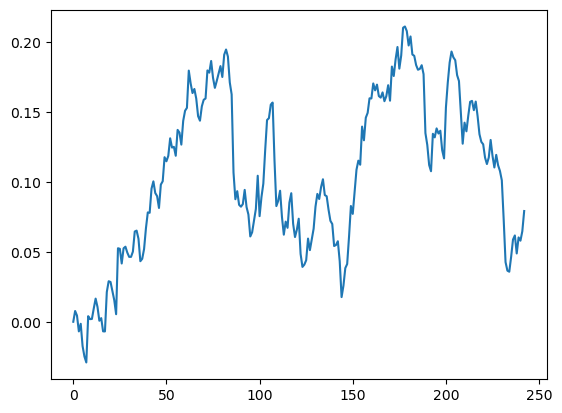

In [9]:
plt.plot(DataFrameDict['AAPL']['cum_ret'])

<font size="3"> As you can see you don't get the dates there. You can add an extra argument to the function, and plot the total cumulative return against the dates using the following script.
<br><br>

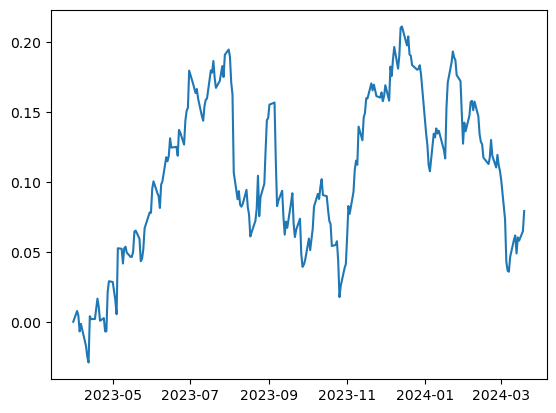

In [10]:
plt.plot(DataFrameDict['AAPL']['Date'],DataFrameDict['AAPL']['cum_ret'])

<font size="3"> You can change the font's type and size for each axis, you can rotate the ticks values, you can put a title to the chart and you can also remove the box around the figure using the following script
<br><br>

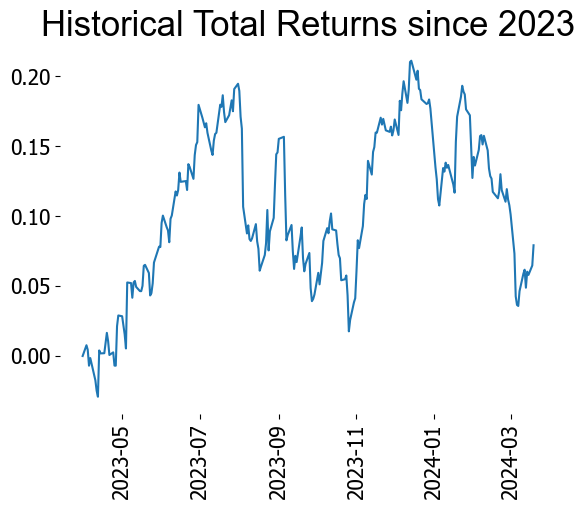

In [11]:
plt.plot(DataFrameDict['AAPL']['Date'],DataFrameDict['AAPL']['cum_ret'])
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
plt.title("Historical Total Returns since " + str(start_year), size=25, family='Arial')
plt.box(on=None)

<font size="3"> To manipulate the chart more easily, it would be better to use the object figure and the function add_subplot. With those, you can edit some other important fetures of the chart. For example, here we can define the space between each ticker in the x or y axis, we can manipulate the legend using ax.legend, we can define the limits for each axis or we can define the format for the ticks in each axis. You can observe all of that below.
<br><br>

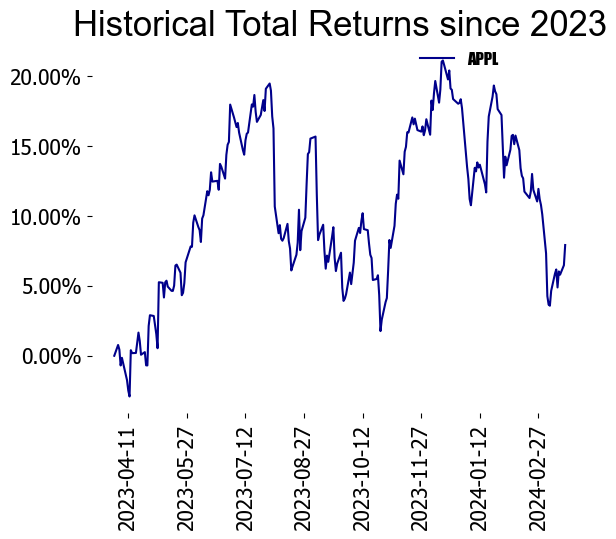

In [18]:
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=12)
tick_spacing = np.round(timeframe.days/8,0)

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(DataFrameDict['AAPL']['Date'],DataFrameDict['AAPL']['cum_ret']*100,color='darkblue',label='APPL')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.85, 1.02),ncol=10,markerscale=5)

plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
plt.title("Historical Total Returns since " + str(start_year), size=25, family='Arial')

ax.axis([None, None, None, None])
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))

plt.box(on=None)

<font size="3"> Finally we can iterate through the different keys in the dictionary and get a plot for each ticker. We iterate using the script: for key in DataFrame.keys. We also iterate using the i number to be able to put the colors that we defined before for each time series.
<br><br>

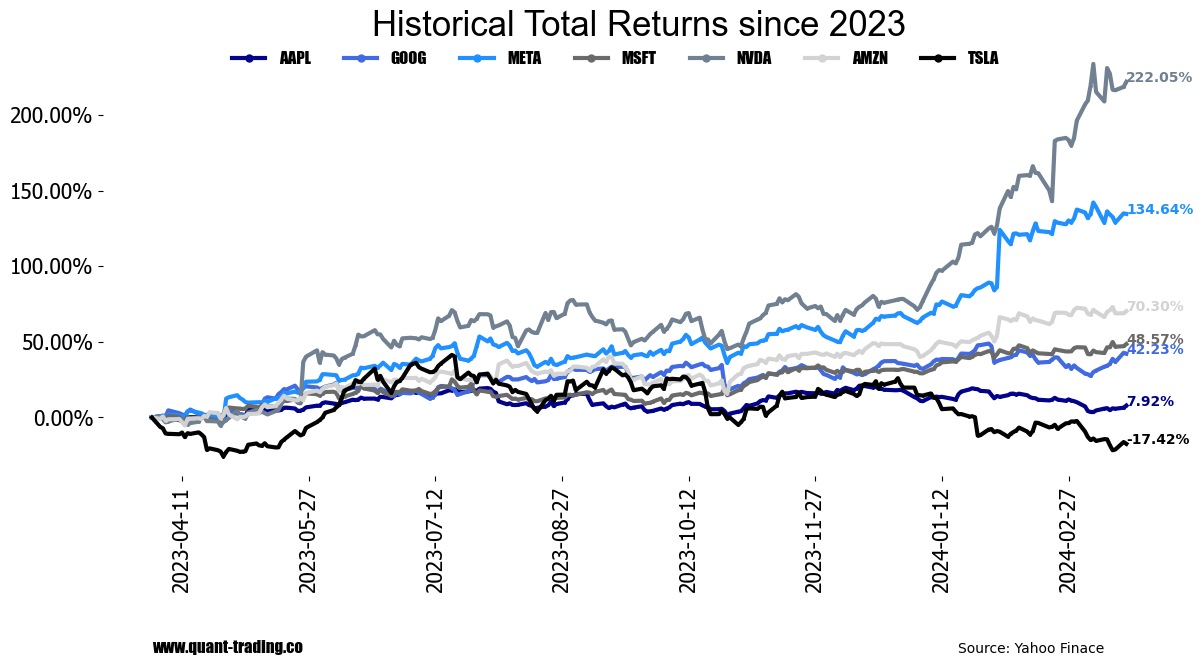

In [19]:
#CREATE CHART

font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=12)
tick_spacing = np.round(timeframe.days/8,0)
i = 0

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for key in DataFrameDict.keys():
    my_color = my_colors[i]    
    ax.plot(DataFrameDict[key]['Date'],DataFrameDict[key]['cum_ret']*100,marker='o', linestyle='solid',linewidth=3,color=my_color,label=key,alpha=0.99,markersize=1)
    ax.text(DataFrameDict[key]['Date'].iloc[-1], DataFrameDict[key]['cum_ret'].iloc[-1]*100,'{0:.2%}'.format(DataFrameDict[key]['cum_ret'].iloc[-1]) , color=my_color, fontsize=10,weight='bold')
    i = i + 1

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.85, 1.02),ncol=10,markerscale=5)
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
# ax.title.set_fontfamily('arial')
ax.axis([None, None, None, None])
ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.title("Historical Total Returns since " + str(start_year), size=25, family='Arial')
plt.box(on=None)

ax.set_facecolor('white') 

ax.text(start, (min_value-my_range/2)*100,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
ax.text(end - timeframe*0.2, (min_value-my_range/2)*100,'Source: Yahoo Finace' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)